# Project:  Heart attack prediction 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn
import matplotlib

from pathlib import Path
import glob
import logging  
 
plt.rcParams['figure.figsize'] = (14,6)

In [24]:

for name in glob.glob('data/*.csv*xls'):
    print(name)

data/heart.csv.xls
data/o2Saturation.csv.xls


In [25]:
heart = pd.read_csv('./data/heart.csv.xls')

In [26]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [27]:
print(df.isna().sum().sort_values(ascending=False))

output      0
thall       0
caa         0
slp         0
oldpeak     0
exng        0
thalachh    0
restecg     0
fbs         0
chol        0
trtbps      0
cp          0
sex         0
age         0
dtype: int64


In [28]:
o2Sat= pd.read_csv('./data/o2Saturation.csv.xls')

In [29]:
o2Sat

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


array([[<AxesSubplot:title={'center':'98.6'}>]], dtype=object)

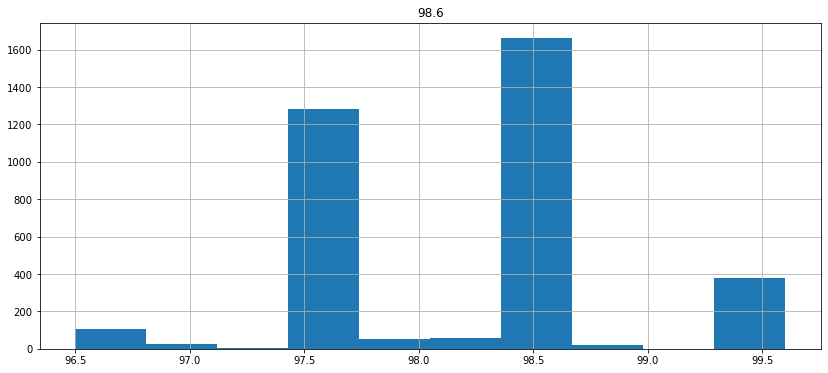

In [30]:
o2Sat.hist()

In [31]:
heart.describe(include = "all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
df = heart.copy()

<AxesSubplot:title={'center':'Correlation with output'}>

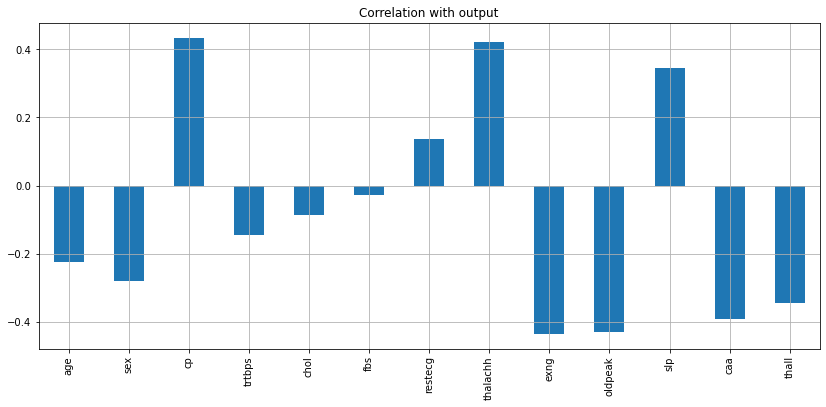

In [33]:
df.drop('output', axis=1).corrwith(df.output).plot(kind='bar' , grid=True, title="Correlation with output")

Skewness = -0.17982105403495655


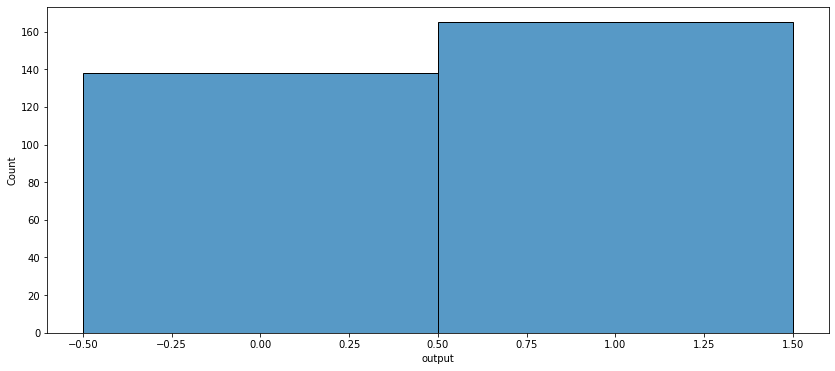

In [37]:
seaborn.histplot(data = df, x = "output",stat = "count",bins=2,discrete=True)
print("Skewness = {0}".format(df["output"].skew()))

<AxesSubplot:title={'center':'Correlation with trtbps'}>

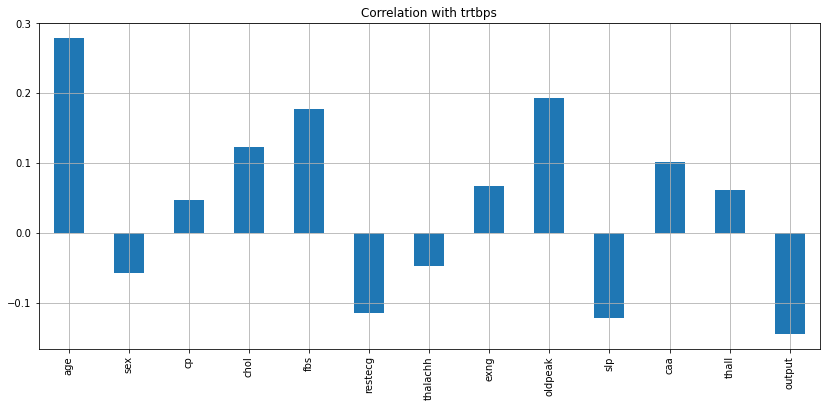

In [38]:
df.drop('trtbps', axis=1).corrwith(df.trtbps).plot(kind='bar' , grid=True, title="Correlation with trtbps")

In [39]:
corr_data = df.corr()
print(corr_data["output"].sort_values(ascending=False)[1:4])
print(corr_data["output"].sort_values(ascending=True)[:3])
corr_data.style.background_gradient(cmap='coolwarm', axis=None).set_precision(6)

cp          0.433798
thalachh    0.421741
slp         0.345877
Name: output, dtype: float64
exng      -0.436757
oldpeak   -0.430696
caa       -0.391724
Name: output, dtype: float64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
